# mlrose_hiive Tutorial Examples - Genevieve Hayes

## Overview

mlrose_hiive is a Python package for applying some of the most common randomized optimization and search algorithms to a range of different optimization problems, over both discrete- and continuous-valued parameter spaces. This notebook contains the examples used in the mlrose_hiive tutorial.

### Import Libraries

In [1]:
import mlrose_hiive
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

### Example 2: 8-Queens Using Custom Fitness Function

In [3]:
# Define alternative N-Queens fitness function for maximization problem
evaluations = []
def queens_max(state):
    
    # Initialize counter
    fitness = 0
    
    # For all pairs of queens
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):
            
            # Check for horizontal, diagonal-up and diagonal-down attacks
            if (state[j] != state[i]) \
                and (state[j] != state[i] + (j - i)) \
                and (state[j] != state[i] - (j - i)):
                
                # If no attacks, then increment counter
                fitness += 1
    evaluations.append(fitness)
    return fitness

In [4]:
# Check function is working correctly
state = np.array([1, 4, 1, 3, 5, 5, 2, 7])
state = np.array([4,1,3,5,7,2,0,6])
# The fitness of this state should be 22
queens_max(state)

28

In [5]:
# Initialize custom fitness function object
fitness_cust = mlrose_hiive.CustomFitness(queens_max)

In [6]:
# Define optimization problem object
problem_cust = mlrose_hiive.DiscreteOpt(length = 8, fitness_fn = fitness_cust, maximize = True, max_val = 8)
problem_cust.set_mimic_fast_mode(True)

In [7]:
# Solve using simulated annealing - attempt 1
init_state = np.array([0, 1, 2, 3, 4, 5, 6, 7])
schedule = mlrose_hiive.ExpDecay()

best_state, best_fitness, _ = mlrose_hiive.simulated_annealing(problem_cust, schedule = schedule, 
                                                      max_attempts = 10, max_iters = 1000, 
                                                      init_state = init_state, random_state = 1)

In [8]:
best_fitness

26.0

In [9]:
best_state

array([6, 4, 7, 3, 6, 2, 5, 1])

## queens grid search

In [10]:
OUTPUT_DIRECTORY = 'output'
SEED = 1
experiment_name = 'queens'

### rhc

In [11]:
from mlrose_hiive.runners import RHCRunner

#experiment_name = 'example_experiment'

rhc = RHCRunner(problem=problem_cust,
                experiment_name=experiment_name,
                output_directory=OUTPUT_DIRECTORY,
                seed=SEED,
                iteration_list=[0,50,100],
                max_attempts=100,
                restart_list=[0,10,25])

df_run_stats, df_run_curves = rhc.run()  

Running rhc
*****************
*** Run START ***
*****************
restarts:[0], max_iters:[100], current_restart:[0]
runner_name:[rhc], experiment_name:[queens], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[23.0000]
	[5 3 4 0 7 1 3 5]...

restarts:[0], max_iters:[100], current_restart:[0]
runner_name:[rhc], experiment_name:[queens], attempt:[11], iteration:[50], done:[False], time:[0.02], fitness:[26.0000]
	[5 2 4 7 7 1 3 6]...

restarts:[0], max_iters:[100], current_restart:[0]
runner_name:[rhc], experiment_name:[queens], attempt:[29], iteration:[100], done:[True], time:[1.17], fitness:[28.0000]
	[5 2 0 7 4 1 3 6]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
restarts:[10], max_iters:[100], current_restart:[0]
runner_name:[rhc], experiment_name:[queens], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[23.0000]
	[5 3 4 0 7 1 3 5]...

restarts:[10], max_iters:[100], current_restart:[0]
runner_

restarts:[25], max_iters:[100], current_restart:[2]
runner_name:[rhc], experiment_name:[queens], attempt:[0], iteration:[0], done:[False], time:[0.31], fitness:[21.0000]
	[0 2 4 6 7 0 6 2]...

restarts:[25], max_iters:[100], current_restart:[2]
runner_name:[rhc], experiment_name:[queens], attempt:[33], iteration:[50], done:[False], time:[0.32], fitness:[26.0000]
	[1 2 4 6 3 0 4 7]...

restarts:[25], max_iters:[100], current_restart:[2]
runner_name:[rhc], experiment_name:[queens], attempt:[83], iteration:[100], done:[True], time:[0.41], fitness:[26.0000]
	[1 2 4 6 3 0 4 7]...

restarts:[25], max_iters:[100], current_restart:[3]
runner_name:[rhc], experiment_name:[queens], attempt:[0], iteration:[0], done:[False], time:[0.47], fitness:[18.0000]
	[3 4 0 6 7 5 3 5]...

restarts:[25], max_iters:[100], current_restart:[3]
runner_name:[rhc], experiment_name:[queens], attempt:[8], iteration:[50], done:[False], time:[0.49], fitness:[26.0000]
	[3 5 0 2 6 5 1 4]...

restarts:[25], max_iters:[100]

restarts:[25], max_iters:[100], current_restart:[16]
runner_name:[rhc], experiment_name:[queens], attempt:[29], iteration:[50], done:[False], time:[4.04], fitness:[25.0000]
	[7 0 4 6 1 6 4 1]...

restarts:[25], max_iters:[100], current_restart:[16]
runner_name:[rhc], experiment_name:[queens], attempt:[1], iteration:[100], done:[True], time:[4.21], fitness:[26.0000]
	[7 0 2 6 1 6 4 1]...

restarts:[25], max_iters:[100], current_restart:[17]
runner_name:[rhc], experiment_name:[queens], attempt:[0], iteration:[0], done:[False], time:[4.35], fitness:[23.0000]
	[3 5 2 5 1 6 3 3]...

restarts:[25], max_iters:[100], current_restart:[17]
runner_name:[rhc], experiment_name:[queens], attempt:[14], iteration:[50], done:[False], time:[4.41], fitness:[26.0000]
	[3 0 2 5 1 6 1 3]...

restarts:[25], max_iters:[100], current_restart:[17]
runner_name:[rhc], experiment_name:[queens], attempt:[64], iteration:[100], done:[True], time:[4.54], fitness:[26.0000]
	[3 0 2 5 1 6 1 3]...

restarts:[25], max_iter

In [13]:
df_run_stats.head()

,Iteration,Fitness,Time,State,Restarts,max_iters,current_restart
0,0,23.0,0.000251,"[5, 3, 4, 0, 7, 1, 3, 5]",0,100,0
1,50,26.0,0.024750,"[5, 2, 4, 7, 7, 1, 3, 6]",0,100,0
2,100,28.0,1.171889,"[5, 2, 0, 7, 4, 1, 3, 6]",0,100,0
3,0,23.0,0.000214,"[5, 3, 4, 0, 7, 1, 3, 5]",10,100,0
4,50,26.0,0.012299,"[5, 2, 4, 7, 7, 1, 3, 6]",10,100,0


In [14]:
df_run_stats.groupby(['Restarts'])['Time','Fitness'].max()

,Time,Fitness
Restarts,,
0,1.171889,28.0
10,1.480291,28.0
25,7.783487,28.0


In [36]:
evaluations = []
best_state, best_fitness, fitness_curve_rhc,time_curve_rhc,all_time_rhc = mlrose_hiive.random_hill_climb(problem_cust, 
                                                                            max_attempts=100, max_iters=np.inf, restarts=25,
                      init_state=init_state, curve=True, random_state = 1)

In [19]:
best_fitness

28.0

In [20]:
best_state

array([3, 1, 6, 2, 5, 7, 0, 4])

In [37]:
evaluations_rhc = evaluations.copy()

### SA

In [95]:
from mlrose_hiive.runners import SARunner

experiment_name = 'example_experiment'
#problem = TSPGenerator.generate(seed=SEED, number_of_cities=22)
sa = SARunner(problem=problem_cust,
              experiment_name=experiment_name,
              output_directory='output/',
              seed=1,
              iteration_list=2 ** np.arange(14),
              max_attempts=1000,
              temperature_list=[1, 10, 50, 100, 250, 500, 1000, 2500, 5000, 10000])
# the two data frames will contain the results
df_run_stats, df_run_curves = sa.run()        

Running sa
*****************
*** Run START ***
*****************
schedule:[1], max_iters:[8192]
runner_name:[sa], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[23.0000]
	[5 3 4 0 7 1 3 5]...

schedule:[1], max_iters:[8192]
runner_name:[sa], experiment_name:[example_experiment], attempt:[1], iteration:[1], done:[False], time:[0.00], fitness:[23.0000]
	[5 3 4 0 7 1 3 0]...

schedule:[1], max_iters:[8192]
runner_name:[sa], experiment_name:[example_experiment], attempt:[2], iteration:[2], done:[False], time:[0.02], fitness:[23.0000]
	[5 3 4 0 7 1 3 0]...

schedule:[1], max_iters:[8192]
runner_name:[sa], experiment_name:[example_experiment], attempt:[1], iteration:[4], done:[False], time:[0.04], fitness:[23.0000]
	[5 2 4 0 6 1 3 0]...

schedule:[1], max_iters:[8192]
runner_name:[sa], experiment_name:[example_experiment], attempt:[5], iteration:[8], done:[False], time:[0.05], fitness:[23.0000]
	[5 2 4 0 6 1 3 0]...

schedule:[1], max_it

schedule:[100], max_iters:[8192]
runner_name:[sa], experiment_name:[example_experiment], attempt:[1], iteration:[32], done:[False], time:[0.26], fitness:[22.0000]
	[0 2 2 6 3 2 7 1]...

schedule:[100], max_iters:[8192]
runner_name:[sa], experiment_name:[example_experiment], attempt:[1], iteration:[64], done:[False], time:[0.33], fitness:[23.0000]
	[2 7 1 1 5 5 6 6]...

schedule:[100], max_iters:[8192]
runner_name:[sa], experiment_name:[example_experiment], attempt:[1], iteration:[128], done:[False], time:[0.40], fitness:[18.0000]
	[3 4 7 3 4 5 6 6]...

schedule:[100], max_iters:[8192]
runner_name:[sa], experiment_name:[example_experiment], attempt:[1], iteration:[256], done:[False], time:[0.46], fitness:[20.0000]
	[6 6 2 4 5 3 6 0]...

schedule:[100], max_iters:[8192]
runner_name:[sa], experiment_name:[example_experiment], attempt:[2], iteration:[512], done:[False], time:[0.56], fitness:[24.0000]
	[2 7 1 3 0 7 3 4]...

schedule:[100], max_iters:[8192]
runner_name:[sa], experiment_name:

schedule:[1000], max_iters:[8192]
runner_name:[sa], experiment_name:[example_experiment], attempt:[1], iteration:[128], done:[False], time:[0.85], fitness:[18.0000]
	[0 3 7 3 5 5 7 5]...

schedule:[1000], max_iters:[8192]
runner_name:[sa], experiment_name:[example_experiment], attempt:[1], iteration:[256], done:[False], time:[0.99], fitness:[22.0000]
	[7 5 1 3 4 0 6 5]...

schedule:[1000], max_iters:[8192]
runner_name:[sa], experiment_name:[example_experiment], attempt:[1], iteration:[512], done:[False], time:[1.19], fitness:[18.0000]
	[6 1 4 4 2 6 4 7]...

schedule:[1000], max_iters:[8192]
runner_name:[sa], experiment_name:[example_experiment], attempt:[55], iteration:[1024], done:[False], time:[1.41], fitness:[27.0000]
	[1 4 7 3 0 2 5 6]...

schedule:[1000], max_iters:[8192]
runner_name:[sa], experiment_name:[example_experiment], attempt:[652], iteration:[2048], done:[False], time:[1.71], fitness:[28.0000]
	[3 1 7 5 0 2 4 6]...

schedule:[1000], max_iters:[8192]
runner_name:[sa], exp

In [23]:
df_run_stats[:10]

,Iteration,Fitness,Time,State,schedule_type,schedule_init_temp,schedule_decay,schedule_min_temp,schedule_current_value,Temperature,max_iters
0,0,23.0,0.000168,"[5, 3, 4, 0, 7, 1, 3, 5]",geometric,1,0.99,0.001,0.999998,1,8192
1,1,23.0,0.000995,"[5, 3, 4, 0, 7, 1, 3, 0]",geometric,1,0.99,0.001,0.999990,1,8192
2,2,23.0,0.595410,"[5, 3, 4, 0, 7, 1, 3, 0]",geometric,1,0.99,0.001,0.994034,1,8192
3,4,23.0,0.602797,"[5, 2, 4, 0, 6, 1, 3, 0]",geometric,1,0.99,0.001,0.993960,1,8192
4,8,23.0,0.610146,"[5, 2, 4, 0, 6, 1, 3, 0]",geometric,1,0.99,0.001,0.993887,1,8192
5,16,22.0,0.617275,"[5, 2, 1, 0, 6, 7, 3, 0]",geometric,1,0.99,0.001,0.993815,1,8192
6,32,24.0,0.625452,"[0, 2, 0, 7, 2, 7, 1, 4]",geometric,1,0.99,0.001,0.993734,1,8192
7,64,23.0,0.634812,"[7, 2, 6, 7, 5, 1, 0, 6]",geometric,1,0.99,0.001,0.993640,1,8192
8,128,25.0,0.647640,"[6, 3, 7, 0, 4, 2, 2, 5]",geometric,1,0.99,0.001,0.993512,1,8192
9,256,27.0,0.663838,"[6, 3, 7, 0, 4, 6, 1, 5]",geometric,1,0.99,0.001,0.993350,1,8192


In [50]:
schedule

ExpDecay(init_temp=1.0, exp_const=0.005, min_temp=0.001)

In [51]:
df_run_curves.Temperature.iloc[0]

GeomDecay(init_temp=1, decay=0.99, min_temp=0.001)

In [29]:
df_run_stats.max_iters.unique()

array([8192], dtype=int64)

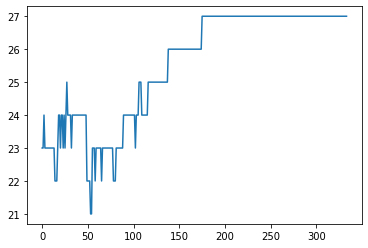

In [45]:
plt.plot(df_run_curves[df_run_curves.Temperature==df_run_curves.Temperature.iloc[0]].Fitness)

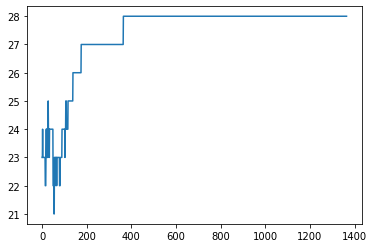

In [49]:
plt.plot(df_run_curves[df_run_curves.Temperature==df_run_curves.Temperature.iloc[0]].Fitness)

In [48]:
max(df_run_curves[df_run_curves.Temperature==df_run_curves.Temperature.iloc[0]].Fitness)

28.0

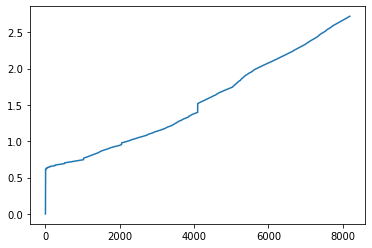

In [42]:
plt.plot(df_run_curves[df_run_curves.Temperature==df_run_curves.Temperature.iloc[0]].Time)

In [35]:
df_run_curves.Temperature.iloc[0]

GeomDecay(init_temp=1, decay=0.99, min_temp=0.001)

In [39]:
df_run_curves.head(10)

,Iteration,Time,Fitness,Temperature,max_iters
0,0,0.000168,23.0,1,8192
1,1,0.000995,23.0,1,8192
2,2,0.595410,24.0,1,8192
3,3,0.602652,23.0,1,8192
4,4,0.602797,23.0,1,8192
5,5,0.609945,23.0,1,8192
6,6,0.610022,23.0,1,8192
7,7,0.610087,23.0,1,8192
8,8,0.610146,23.0,1,8192
9,9,0.616723,23.0,1,8192


In [34]:
# Solve using simulated annealing - attempt 1
init_state = np.array([0, 1, 2, 3, 4, 5, 6, 7])
schedule = mlrose_hiive.ExpDecay()
evaluations = []
best_state, best_fitness, fitness_curve_sa,time_curve_sa = mlrose_hiive.simulated_annealing(problem_cust, 
                                                                                            schedule = schedule, 
                                                      max_attempts = 100, 
                                                                            max_iters = 10000, 
                                                      init_state = init_state, random_state = 1,curve=True)


In [22]:
print(best_fitness)

28.0


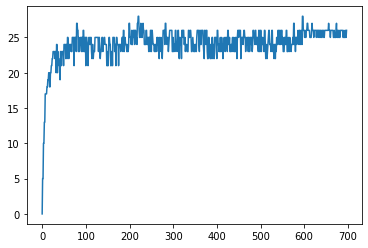

In [35]:
plt.plot(evaluations)
evaluations_sa = evaluations.copy()
evaluations = []

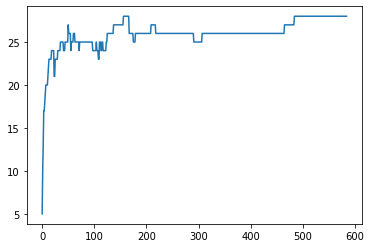

In [112]:
plt.plot(fitness_curve_sa)

### GA

In [60]:
from mlrose_hiive.runners import GARunner

experiment_name = 'example_experiment'
ga = GARunner(problem=problem_cust,
              experiment_name=experiment_name,
              output_directory=OUTPUT_DIRECTORY,
              seed=SEED,
              iteration_list=2 ** np.arange(12),
              max_attempts=1000,
              population_sizes=[150, 200, 300],
              mutation_rates=[0.4, 0.5, 0.6])

# the two data frames will contain the results
df_run_stats, df_run_curves = ga.run()   

Running ga
*****************
*** Run START ***
*****************
pop_size:[150], mutation_prob:[0.4], max_iters:[2048]
runner_name:[ga], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.02], fitness:[23.0000]
	[5 3 4 0 7 1 3 5]...

pop_size:[150], mutation_prob:[0.4], max_iters:[2048]
runner_name:[ga], experiment_name:[example_experiment], attempt:[1], iteration:[1], done:[False], time:[0.06], fitness:[26.0000]
	[3 6 0 7 2 7 5 1]...

pop_size:[150], mutation_prob:[0.4], max_iters:[2048]
runner_name:[ga], experiment_name:[example_experiment], attempt:[2], iteration:[2], done:[False], time:[0.12], fitness:[26.0000]
	[3 6 0 7 2 7 5 1]...

pop_size:[150], mutation_prob:[0.4], max_iters:[2048]
runner_name:[ga], experiment_name:[example_experiment], attempt:[4], iteration:[4], done:[False], time:[0.20], fitness:[26.0000]
	[3 6 0 7 2 7 5 1]...

pop_size:[150], mutation_prob:[0.4], max_iters:[2048]
runner_name:[ga], experiment_name:[example_experiment], a

pop_size:[200], mutation_prob:[0.4], max_iters:[2048]
runner_name:[ga], experiment_name:[example_experiment], attempt:[4], iteration:[4], done:[False], time:[0.14], fitness:[26.0000]
	[0 4 5 1 6 3 7 2]...

pop_size:[200], mutation_prob:[0.4], max_iters:[2048]
runner_name:[ga], experiment_name:[example_experiment], attempt:[1], iteration:[8], done:[False], time:[0.28], fitness:[28.0000]
	[4 0 7 5 2 6 1 3]...

pop_size:[200], mutation_prob:[0.4], max_iters:[2048]
runner_name:[ga], experiment_name:[example_experiment], attempt:[9], iteration:[16], done:[False], time:[0.49], fitness:[28.0000]
	[4 0 7 5 2 6 1 3]...

pop_size:[200], mutation_prob:[0.4], max_iters:[2048]
runner_name:[ga], experiment_name:[example_experiment], attempt:[25], iteration:[32], done:[False], time:[0.86], fitness:[28.0000]
	[4 0 7 5 2 6 1 3]...

pop_size:[200], mutation_prob:[0.4], max_iters:[2048]
runner_name:[ga], experiment_name:[example_experiment], attempt:[57], iteration:[64], done:[False], time:[1.58], fitnes

pop_size:[300], mutation_prob:[0.4], max_iters:[2048]
runner_name:[ga], experiment_name:[example_experiment], attempt:[4], iteration:[4], done:[False], time:[0.57], fitness:[26.0000]
	[5 7 4 0 3 6 2 7]...

pop_size:[300], mutation_prob:[0.4], max_iters:[2048]
runner_name:[ga], experiment_name:[example_experiment], attempt:[8], iteration:[8], done:[False], time:[0.96], fitness:[26.0000]
	[5 7 4 0 3 6 2 7]...

pop_size:[300], mutation_prob:[0.4], max_iters:[2048]
runner_name:[ga], experiment_name:[example_experiment], attempt:[6], iteration:[16], done:[False], time:[1.57], fitness:[27.0000]
	[1 4 4 7 0 3 6 2]...

pop_size:[300], mutation_prob:[0.4], max_iters:[2048]
runner_name:[ga], experiment_name:[example_experiment], attempt:[5], iteration:[32], done:[False], time:[2.59], fitness:[28.0000]
	[1 6 4 7 0 3 5 2]...

pop_size:[300], mutation_prob:[0.4], max_iters:[2048]
runner_name:[ga], experiment_name:[example_experiment], attempt:[37], iteration:[64], done:[False], time:[4.47], fitness

In [392]:
from mlrose_hiive.runners import GARunner

experiment_name = 'example_experiment'
ga = GARunner(problem=problem_cust,
              experiment_name=experiment_name,
              output_directory=OUTPUT_DIRECTORY,
              seed=SEED,
              iteration_list=2 ** np.arange(12),
              max_attempts=1000,
              population_sizes=[150],
              mutation_rates=[0.4])

# the two data frames will contain the results
df_run_stats, df_run_curves = ga.run()   

Running ga
*****************
*** Run START ***
*****************
pop_size:[150], mutation_prob:[0.4], max_iters:[2048]
runner_name:[ga], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.02], fitness:[23.0000]
	[5 3 4 0 7 1 3 5]...

pop_size:[150], mutation_prob:[0.4], max_iters:[2048]
runner_name:[ga], experiment_name:[example_experiment], attempt:[1], iteration:[1], done:[False], time:[0.05], fitness:[26.0000]
	[3 6 0 7 2 7 5 1]...

pop_size:[150], mutation_prob:[0.4], max_iters:[2048]
runner_name:[ga], experiment_name:[example_experiment], attempt:[2], iteration:[2], done:[False], time:[0.13], fitness:[26.0000]
	[3 6 0 7 2 7 5 1]...

pop_size:[150], mutation_prob:[0.4], max_iters:[2048]
runner_name:[ga], experiment_name:[example_experiment], attempt:[4], iteration:[4], done:[False], time:[0.22], fitness:[26.0000]
	[3 6 0 7 2 7 5 1]...

pop_size:[150], mutation_prob:[0.4], max_iters:[2048]
runner_name:[ga], experiment_name:[example_experiment], a

In [62]:
df_run_curves.head()

,Iteration,Time,Fitness,Population Size,Mutation Rate,max_iters
0,0,0.016922,26.0,150,0.4,2048
1,1,0.058788,26.0,150,0.4,2048
2,2,0.117194,26.0,150,0.4,2048
3,3,0.144888,26.0,150,0.4,2048
4,4,0.196347,26.0,150,0.4,2048


In [66]:
df_run_curves['Mutation Rate'].iloc[0]

0.4

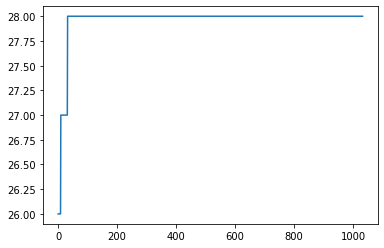

In [77]:
plt.plot(df_run_curves[(df_run_curves['Population Size']==150) & (df_run_curves['Mutation Rate']==0.4)].Fitness)

In [78]:
df_run_curves[(df_run_curves['Population Size']==150) & (df_run_curves['Mutation Rate']==0.4)].iloc[-1]

Iteration          1032.000000
Time                 17.015993
Fitness              28.000000
Population Size     150.000000
Mutation Rate         0.400000
max_iters          2048.000000
Name: 1032, dtype: float64

In [92]:
df_run_stats.groupby(['Population Size','Mutation Rate'])['Time','Fitness'].sum()

Time  Fitness
Population Size Mutation Rate                     
150             0.4             52.361090    349.0
                0.5             50.628644    350.0
                0.6             50.008105    351.0
200             0.4             68.766307    353.0
                0.5             83.283506    351.0
                0.6             98.020604    350.0
300             0.4            188.548670    350.0
                0.5            152.740487    352.0
                0.6            148.184451    355.0

In [93]:
df_run_stats.groupby(['Population Size','Mutation Rate'])['Time','Fitness'].max()

Time  Fitness
Population Size Mutation Rate                    
150             0.4            17.031234     28.0
                0.5            16.149241     28.0
                0.6            16.293670     28.0
200             0.4            22.258415     28.0
                0.5            26.736798     28.0
                0.6            30.870644     28.0
300             0.4            60.001268     28.0
                0.5            48.221579     28.0
                0.6            44.995372     28.0

In [94]:
df_run_curves.head()

,Iteration,Time,Fitness,Population Size,Mutation Rate,max_iters
0,0,0.016922,26.0,150,0.4,2048
1,1,0.058788,26.0,150,0.4,2048
2,2,0.117194,26.0,150,0.4,2048
3,3,0.144888,26.0,150,0.4,2048
4,4,0.196347,26.0,150,0.4,2048


In [38]:
# Solve using genetic algorithm
evaluations = []
best_state, best_fitness, fitness_curve_ga,time_curve_ga = mlrose_hiive.genetic_alg(problem_cust, mutation_prob = 0.6,
                                                                      pop_size= 300,
                                                                       max_attempts = 100, 
                                              random_state = 2,curve=True)


In [39]:
best_fitness

28.0

In [40]:
evaluations_ga = evaluations.copy()

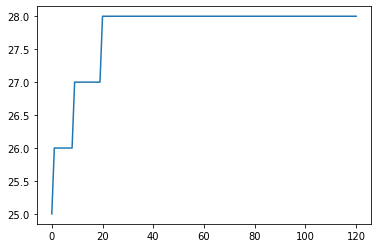

In [105]:
plt.plot(fitness_curve_ga)

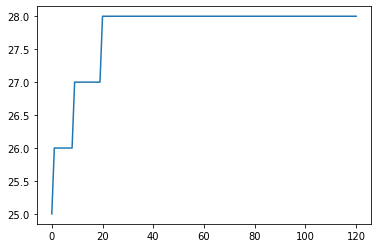

In [101]:
plt.plot(fitness_curve_ga)

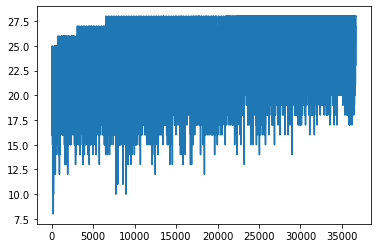

In [106]:
plt.plot(evaluations)
evaluations=[]

In [85]:
from mlrose_hiive.runners import MIMICRunner

experiment_name = 'example_experiment'
#problem = TSPGenerator.generate(seed=SEED, number_of_cities=22)

mmc = MIMICRunner(problem=problem_cust,
                  experiment_name=experiment_name,
                  output_directory=OUTPUT_DIRECTORY,
                  seed=2,
                  iteration_list=[1000],
                  max_attempts=100,
                  population_sizes=[100,150, 200, 300],
                  keep_percent_list=[0.25, 0.5, 0.75])


In [86]:
df_run_stats, df_run_curves = mmc.run()   

Running mimic
*****************
*** Run START ***
*****************
use_fast_mimic:[False], pop_size:[100], keep_pct:[0.25], max_iters:[1000]
runner_name:[mimic], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.01], fitness:[21.0000]
	[0 7 5 0 6 3 2 3]...

use_fast_mimic:[False], pop_size:[100], keep_pct:[0.25], max_iters:[1000]
runner_name:[mimic], experiment_name:[example_experiment], attempt:[101], iteration:[102], done:[True], time:[3.27], fitness:[27.0000]
	[4. 6. 3. 0. 7. 1. 5. 2.]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[False], pop_size:[100], keep_pct:[0.5], max_iters:[1000]
runner_name:[mimic], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[21.0000]
	[0 7 5 0 6 3 2 3]...

use_fast_mimic:[False], pop_size:[100], keep_pct:[0.5], max_iters:[1000]
runner_name:[mimic], experiment_name:[example_experiment], a

In [87]:
df_run_stats

,Iteration,Fitness,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,21.0,0.009392,"[0, 7, 5, 0, 6, 3, 2, 3]",False,100,0.25,1000
1,1000,27.0,3.268217,"[4.0, 6.0, 3.0, 0.0, 7.0, 1.0, 5.0, 2.0]",False,100,0.25,1000
2,0,21.0,0.004507,"[0, 7, 5, 0, 6, 3, 2, 3]",False,100,0.50,1000
3,1000,26.0,3.305179,"[5.0, 0.0, 5.0, 3.0, 0.0, 7.0, 4.0, 1.0]",False,100,0.50,1000
4,0,21.0,0.004703,"[0, 7, 5, 0, 6, 3, 2, 3]",False,100,0.75,1000
5,1000,27.0,3.361636,"[0.0, 6.0, 2.0, 5.0, 1.0, 4.0, 7.0, 3.0]",False,100,0.75,1000
6,0,21.0,0.009001,"[0, 7, 5, 0, 6, 3, 2, 3]",False,150,0.25,1000
7,1000,27.0,3.557315,"[4.0, 0.0, 5.0, 0.0, 6.0, 3.0, 7.0, 2.0]",False,150,0.25,1000
8,0,21.0,0.007429,"[0, 7, 5, 0, 6, 3, 2, 3]",False,150,0.50,1000
9,1000,27.0,3.627505,"[3.0, 6.0, 1.0, 5.0, 2.0, 0.0, 7.0, 4.0]",False,150,0.50,1000


In [25]:
evaluations = []
best_state, best_fitness, fitness_curve_bag_queen_mmc,time_curve_mmc = mlrose_hiive.mimic(problem_cust,  
                                                                max_attempts = 200, 
                                                                 max_iters=10000,
                                              random_state = 2,curve=True
                                                                                          ,keep_pct=0.75,pop_size=300
                                                                                         )

In [42]:
evaluations = []
best_state, best_fitness, fitness_curve_bag_queen_mmc,time_curve_mmc = mlrose_hiive.mimic(problem_cust,  
                                                                max_attempts = 100, 
                                                                 max_iters=1000,
                                              random_state = 2,curve=True
                                                                                          ,keep_pct=0.75,pop_size=300
                                                                                         )

In [26]:
best_state

array([5, 3, 6, 0, 7, 1, 4, 2])

In [27]:
best_fitness

28.0

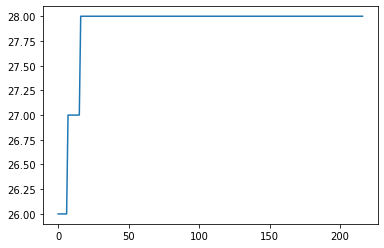

In [95]:
plt.plot(fitness_curve_bag_queen_mmc)

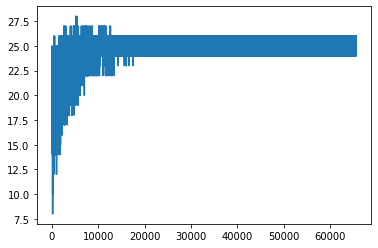

In [96]:
plt.plot(evaluations)

In [33]:
evaluations_mimc = evaluations.copy()

In [418]:
best_state

array([4, 2, 7, 5, 7, 0, 6, 3])

In [129]:
fitness_curve_sa

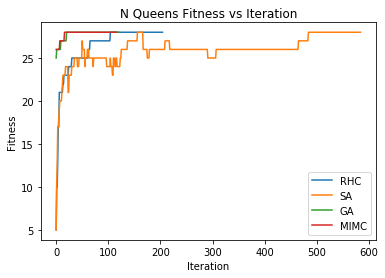

In [107]:
plt.plot(fitness_curve_rhc,label='RHC')
plt.plot(fitness_curve_sa,label='SA')
plt.plot(fitness_curve_ga,label = 'GA')
plt.plot(fitness_curve_bag_queen_mmc,label='MIMC')

plt.title('N Queens Fitness vs Iteration')
plt.ylabel('Fitness')
plt.xlabel('Iteration')
plt.legend()
plt.savefig('output/queens_fit_iter.png')

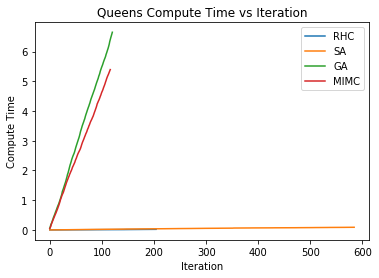

In [108]:
plt.plot(time_curve_rhc,label='RHC')
plt.plot(time_curve_sa,label='SA')
plt.plot(time_curve_ga,label = 'GA')
plt.plot(time_curve_mmc,label='MIMC')

plt.title('Queens Compute Time vs Iteration')
plt.ylabel('Compute Time')
plt.xlabel('Iteration')
plt.legend()
plt.savefig('output/queens_time_iter.png')

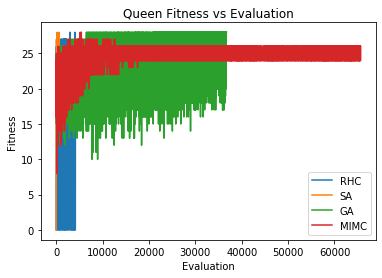

In [41]:
plt.plot(evaluations_rhc,label='RHC')
plt.plot(evaluations_sa,label='SA')
plt.plot(evaluations_ga,label = 'GA')
plt.plot(evaluations_mimc,label='MIMC')

plt.title('Queen Fitness vs Evaluation')
plt.ylabel('Fitness')
plt.xlabel('Evaluation')
plt.legend()
plt.savefig('output/queens_fit_eval.png')

## iteration time vs input size

In [6]:
# Define optimization problem object
problem_cust = mlrose_hiive.DiscreteOpt(length = 8, fitness_fn = fitness_cust, maximize = True, max_val = 8)
problem_cust.set_mimic_fast_mode(True)

In [7]:
# Solve using simulated annealing - attempt 1
init_state = np.array([0, 1, 2, 3, 4, 5, 6, 7])
schedule = mlrose_hiive.ExpDecay()

best_state, best_fitness, fitness_curve_sa,time_curve_sa = mlrose_hiive.simulated_annealing(problem_cust, schedule = schedule, 
                                                      max_attempts = 100, max_iters = 10000, 
                                                      init_state = init_state, random_state = 1)

In [ ]:
evaluations = []
best_state, best_fitness, fitness_curve_rhc,time_curve_rhc,all_time_rhc = mlrose_hiive.random_hill_climb(problem_cust, 
                                                                            max_attempts=100, max_iters=np.inf, restarts=25,
                      init_state=init_state, curve=True, random_state = 1)

In [ ]:
# Solve using genetic algorithm
evaluations = []
best_state, best_fitness, fitness_curve_ga,time_curve_ga = mlrose_hiive.genetic_alg(problem_cust, mutation_prob = 0.6,
                                                                      pop_size= 300,
                                                                       max_attempts = 100, 
                                              random_state = 2,curve=True)


In [44]:
evaluations = []
best_state, best_fitness, fitness_curve_bag_queen_mmc,time_curve_mmc = mlrose_hiive.mimic(problem_cust,  
                                                                max_attempts = 100, 
                                              random_state = 2,curve=True
                                                        ,keep_pct=0.75,pop_size=300
                                                        )

In [92]:
def get_complexity(problem_custs):
    sac = []
    gac = []
    rhcc = []
    mimicc = []
    for problem_cust in problem_custs:
        rhc = mlrose_hiive.random_hill_climb(problem_cust, max_attempts=100, max_iters=np.inf, restarts=25,
                                             curve=True, random_state = 1)
        print('rhc done')
        ga = mlrose_hiive.genetic_alg(problem_cust, mutation_prob = 0.6,pop_size= 300,max_attempts = 100,
                                      random_state = 2,curve=True)
        print('ga done')

        mimc = mlrose_hiive.mimic(problem_cust,  
                                                                max_attempts = 100, 
                                              random_state = 2,curve=True
                                                        ,keep_pct=0.75,pop_size=300
                                                        )
        print('mimc done')
        
        sa = mlrose_hiive.simulated_annealing(problem_cust, schedule = schedule, 
                                                      max_attempts = 100, max_iters = 1000, 
                                                      random_state = 1,curve= True)
        print('sa done')
        sac.append([len(sa[2]),sa[3][-1]])
        gac.append([len(ga[2]),ga[3][-1]])
        rhcc.append([len(rhc[2]),rhc[3][-1]])
        mimicc.append([len(mimc[2]),mimc[3][-1]])
        print(problem_cust)
    return sac,gac,rhcc,mimicc

In [93]:
a,b,c,d = get_complexity([problem_cust])

rhc done
ga done
mimc done
sa done


In [88]:
# Define optimization problem object
size = [8,16,24,32]
problem_custs = []
for s in size:
    p = mlrose_hiive.DiscreteOpt(length = s, fitness_fn = fitness_cust, maximize = True, max_val = s)
    p.set_mimic_fast_mode(True)
    problem_custs.append(p)

In [94]:
a,b,c,d = get_complexity(problem_custs)

rhc done
ga done
mimc done
sa done
rhc done
ga done
mimc done
sa done
rhc done
ga done
mimc done
sa done
rhc done
ga done
mimc done
sa done


In [95]:
d

[[117, 5.740190029144287],
 [139, 32.42132902145386],
 [124, 83.35204291343689],
 [124, 275.1491823196411]]

In [99]:
aa = np.asarray(a)


In [100]:
aa[:,0]

array([ 323.,  917., 1000., 1000.])

In [97]:
a

[[323, 0.08499717712402344],
 [917, 0.6170005798339844],
 [1000, 0.8471262454986572],
 [1000, 1.5329954624176025]]

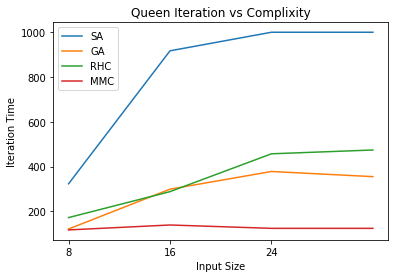

In [104]:
plt.plot(np.asarray(a)[:,0],label ='SA')
plt.plot(np.asarray(b)[:,0],label ='GA')
plt.plot(np.asarray(c)[:,0],label ='RHC')
plt.plot(np.asarray(d)[:,0],label ='MMC')

plt.title('Queen Iteration vs Complixity')
plt.xticks(np.arange(3), size)
plt.ylabel('Iteration Time')
plt.xlabel('Input Size')
plt.legend()
plt.savefig('output/queens_Iteration_comp.png')





## KnapSack

In [120]:
sum(weights)*0.6

24.0

In [207]:
# Initialize fitness function object using pre-defined class
weights = [10, 5, 2, 8, 15]
values = [1, 2, 3, 4, 5]
max_weight_pct = 0.6
fitness = mlrose_hiive.Knapsack(weights, values, max_weight_pct)

In [241]:
import random
random.seed(0) 

wei = [random.randint(1,50) for _ in range(140)]
val = [random.randint(1,50) for _ in range(140)]
max_weight_pct = 0.6
fitness = mlrose_hiive.Knapsack(wei, val, max_weight_pct,max_item_count=10,multiply_by_max_item_count=True)

In [242]:
# Define alternative N-Queens fitness function for maximization problem
evaluations = []
def knapsack_max(state):
    
    currentfit = fitness.evaluate(state)
    evaluations.append(currentfit)
    return currentfit

In [248]:
state=np.array([1]*130+[1]*10)

In [249]:
fitness.evaluate(state)

3426

In [164]:
# Check function is working correctly
state = np.array([0]*140)

# The fitness of this state should be 22
knapsack_max(state)

0

In [250]:
# Initialize custom fitness function object
fitness_cust = mlrose_hiive.CustomFitness(knapsack_max)

In [251]:
state

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [252]:
# Define optimization problem object
problem_cust = mlrose_hiive.DiscreteOpt(length = 140, fitness_fn = fitness_cust, maximize = True,max_val=10)

### SA for sacks

In [253]:
# Solve using simulated annealing - attempt 1
init_state = np.array([0]*140)
schedule = mlrose_hiive.ExpDecay()
best_state, best_fitness, fitness_curve_bag,time_curve_bag = mlrose_hiive.simulated_annealing(problem_cust, schedule = schedule, 
                                                      max_attempts = 100, max_iters = 1000, 
                                                      init_state = init_state, random_state = 1,curve= True)

In [254]:
best_fitness

19560.0

In [255]:
best_state

array([7, 9, 6, 0, 1, 8, 5, 9, 9, 1, 8, 6, 4, 5, 6, 1, 8, 9, 5, 7, 7, 9,
       6, 7, 3, 6, 0, 6, 9, 8, 9, 9, 9, 3, 5, 0, 6, 9, 7, 7, 9, 5, 6, 6,
       7, 8, 4, 8, 6, 4, 3, 8, 7, 6, 9, 9, 9, 9, 9, 9, 0, 9, 7, 7, 0, 2,
       4, 3, 8, 7, 0, 9, 9, 5, 8, 5, 9, 8, 8, 6, 6, 3, 7, 1, 3, 0, 0, 8,
       7, 9, 0, 0, 1, 5, 9, 7, 8, 3, 5, 0, 0, 9, 7, 3, 0, 3, 6, 5, 6, 8,
       4, 9, 8, 3, 6, 9, 7, 3, 8, 8, 0, 7, 6, 3, 4, 8, 8, 4, 9, 8, 1, 7,
       6, 2, 5, 9, 9, 9, 9, 9])

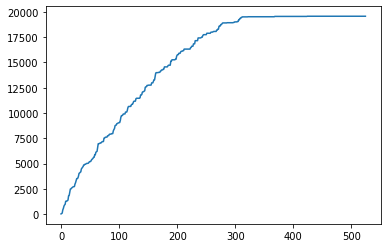

In [256]:
plt.plot(fitness_curve_bag)

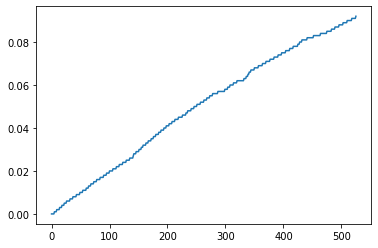

In [257]:
plt.plot(time_curve_bag)

### GA for sacks

In [258]:
# Solve using genetic algorithm
best_state, best_fitness, fitness_curve_bag = mlrose_hiive.genetic_alg(problem_cust, mutation_prob = 0.2, max_attempts = 100, 
                                              random_state = 2,curve=True)

In [259]:
best_fitness

27818.0

In [245]:
np.array([1]*4+[0])

array([1, 1, 1, 1, 0])

In [246]:
state = np.array([1, 1, 1, 1, 1])

In [218]:
fitness.evaluate(state)

0

In [260]:
best_state

array([9, 2, 4, 9, 0, 9, 9, 2, 9, 3, 9, 2, 9, 9, 4, 3, 9, 9, 9, 0, 9, 9,
       9, 9, 9, 0, 3, 0, 9, 0, 9, 9, 0, 8, 3, 9, 3, 0, 9, 3, 1, 0, 9, 1,
       9, 9, 9, 9, 9, 2, 9, 9, 9, 0, 9, 0, 4, 0, 9, 5, 9, 9, 9, 0, 8, 9,
       4, 9, 0, 9, 9, 9, 8, 9, 9, 9, 9, 6, 9, 9, 9, 9, 2, 9, 7, 2, 7, 9,
       9, 0, 9, 8, 9, 6, 0, 9, 9, 9, 9, 9, 8, 9, 7, 9, 9, 9, 4, 8, 9, 0,
       9, 9, 9, 5, 9, 1, 9, 0, 2, 9, 9, 9, 8, 9, 5, 9, 9, 9, 9, 9, 1, 9,
       0, 9, 9, 9, 9, 4, 0, 9])

In [209]:
weights

[10, 5, 2, 8, 15]

In [229]:
sum(best_state)

634

In [178]:
sum(wei)

3623

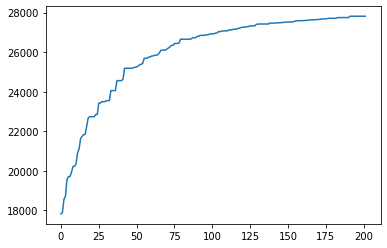

In [261]:
plt.plot(fitness_curve_bag)

## mimic for sacks

In [183]:
state

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [263]:
best_state, best_fitness, fitness_curve_bag = mlrose_hiive.mimic(problem_cust,  max_attempts = 10, 
                                                                 max_iters=100,
                                              random_state = 2,curve=True)

In [348]:
best_state, best_fitness, fitness_curve_bag = mlrose_hiive.mimic(problem_cust,  max_attempts = 1000, 
                                                                 max_iters=10000,
                                              random_state = 2,curve=True)

In [264]:
best_fitness

24614.0

In [165]:
len(wei)

140

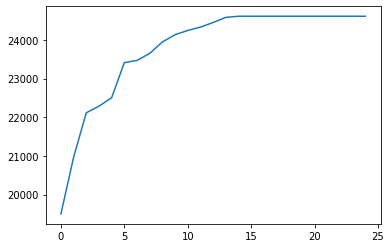

In [265]:
plt.plot(fitness_curve_bag)

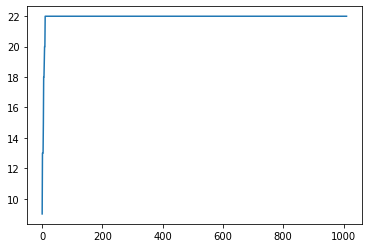

In [350]:
plt.plot(fitness_curve_bag)

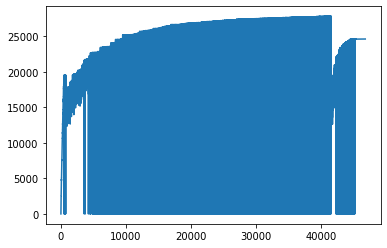

In [267]:
plt.plot(np.array(evaluations))

In [349]:
with open('mimic_sack_eval.npy', 'wb') as f:
    np.save(f, np.array(evaluations))
with open('mimic_sack_fit_curve.npy', 'wb') as f:
    np.save(f, np.array(best_state))
with open('mimic_sack_best_fitness.npy', 'wb') as f:
    np.save(f, np.array(fitness_curve_bag))

In [300]:
    
with open('output/mimic_sack_eval.npy', 'rb') as f:
    a = np.load(f)


In [299]:
import os
os.getcwd()

'C:\\Users\\xiaoyal\\github\\ml_7641\\homework2\\mlrose-master'

# four peaks


In [ ]:
fitness = mlrose_hiive.FourPeaks(t_pct=0.15)


In [352]:
# Initialize fitness function object using pre-defined class
fitness = mlrose_hiive.FourPeaks(t_pct=0.2)


### customized fitness function to keep track of evaluations

In [354]:
# Define alternative N-Queens fitness function for maximization problem
evaluations = []
def fourpeak_max(state):
    
    # Initialize counter
    currentfit = fitness.evaluate(state)
    evaluations.append(currentfit)
    return currentfit

In [355]:
# Initialize custom fitness function object
fitness_cust = mlrose_hiive.CustomFitness(fourpeak_max)

In [356]:
# Check function is working correctly
state = np.array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0])
# The fitness of this state should be 22
fitness_cust.evaluate(state)

4

In [357]:
# Define optimization problem object
problem_cust = mlrose_hiive.DiscreteOpt(length = 60, fitness_fn = fitness_cust, maximize = True, max_val = 2)

In [326]:
random.randint(0,1)

1

In [330]:
init_state[:10]

[1, 1, 0, 1, 1, 1, 1, 1, 1, 0]

### SA for 4 peak

In [353]:
# Define decay schedule
schedule = mlrose_hiive.ExpDecay()

In [362]:
# Solve using simulated annealing - attempt 1
random.seed(0)
init_state = [random.randint(0,1) for _ in range(60)]

best_state, best_fitness, fit_curve,fit_time = mlrose_hiive.simulated_annealing(problem_cust, schedule = schedule, 
                                                      max_attempts = 1000, max_iters = 10000, 
                                                      init_state = init_state, random_state = 1,curve= True)

In [363]:
best_fitness

60.0

In [360]:
best_state

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

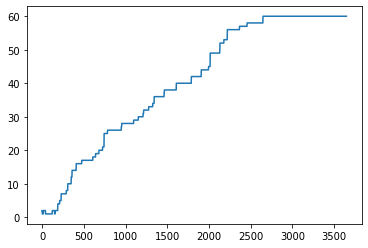

In [364]:
plt.plot(fit_curve)

## mimic for 4 peaks

In [365]:
from mlrose_hiive import mimic

In [368]:
best_state, best_fitness, fitness_curve_mimic = mlrose_hiive.mimic(problem_cust,  max_attempts = 10, 
                                                                 max_iters=100,
                                              random_state = 2,curve=True)

In [369]:
best_fitness

22.0

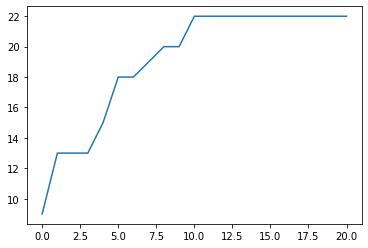

In [371]:
plt.plot(fitness_curve_mimic)

### GA for 4 peaks

In [379]:
best_state, best_fitness, fit_curve = mlrose_hiive.genetic_alg(problem_cust, max_attempts=1000,max_iters=10000, 
                                                               random_state = 2,curve= True)

In [380]:
best_fitness

107.0

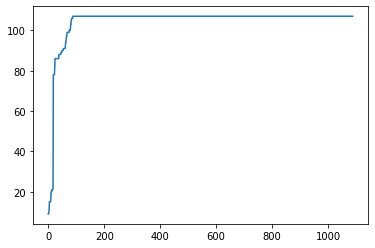

In [381]:
plt.plot(fit_curve)

### rhc for 4 peaks

In [384]:
best_state, best_fitness, fit_curve = mlrose_hiive.random_hill_climb(problem_cust, max_attempts=1000,max_iters=10000, 
                                                               random_state = 2,curve= True,restarts = 5)

In [386]:
best_fitness

60.0

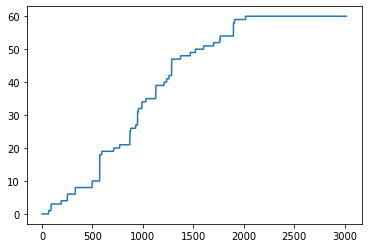

In [385]:
plt.plot(fit_curve)

In [427]:
random.seed(0) 

wei = [random.randint(1,50) for _ in range(140)]

In [428]:
wei[:10]

[25, 49, 27, 3, 17, 33, 32, 26, 20, 31]